# <center>Introduction to Pandas</center>

![](https://pandas.pydata.org/_static/pandas_logo.png)


## Installation

Simply,
```
pip install pandas
```


## Reading data from a CSV file

You can read data from a CSV file using the ``read_csv`` function. By default, it assumes that the fields are comma-separated.

In [1]:
import pandas as pd

>The `imdb.csv` dataset contains Highest Rated IMDb "Top 1000" Titles.

In [2]:
# load imdb dataset as pandas dataframe
df=pd.read_csv("imdb_1000.csv")


In [3]:
# show first 5 rows of imdb_df
df.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


>The `bikes.csv` dataset contains information about the number of bicycles that used certain bicycle lanes in Montreal in the year 2012.

In [52]:
# load bikes dataset as pandas dataframe
df1=pd.read_csv("bikes.csv", sep=";", parse_dates=['Date'], dayfirst=True,index_col='Date')

In [53]:
# show first 3 rows of bikes_df
df1.head(3)

,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
Date,,,,,,,,,,
2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0
2012-01-02,00:00,43,83,153,68,11.0,53,6,1,21.0
2012-01-03,00:00,58,135,248,104,2.0,89,3,2,15.0


## Selecting columns

When you read a CSV, you get a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

In [7]:
# list columns of imdb_df
df.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [8]:
# what are the datatypes of values in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


In [9]:
# list first 5 movie titles
df['title'].head()

0    The Shawshank Redemption
1               The Godfather
2      The Godfather: Part II
3             The Dark Knight
4                Pulp Fiction
Name: title, dtype: object

In [11]:
# show only movie title and genre
df[['title','genre']]

,title,genre
0,The Shawshank Redemption,Crime
1,The Godfather,Crime
2,The Godfather: Part II,Crime
3,The Dark Knight,Action
4,Pulp Fiction,Crime
...,...,...
974,Tootsie,Comedy
975,Back to the Future Part III,Adventure
976,Master and Commander: The Far Side of the World,Action
977,Poltergeist,Horror


## Understanding columns

On the inside, the type of a column is ``pd.Series`` and pandas Series are internally numpy arrays. If you add ``.values`` to the end of any Series, you'll get its internal **numpy array**.

In [16]:
# show the type of duration column
df.dtypes['duration']

dtype('int64')

In [17]:
# show duration values of movies as numpy arrays
df['duration'].values

array([142, 175, 200, 152, 154,  96, 161, 201, 195, 139, 178, 148, 124,
       142, 179, 169, 133, 207, 146, 121, 136, 130, 130, 106, 127, 116,
       175, 118, 110,  87, 125, 112, 102, 107, 119,  87, 169, 115, 112,
       109, 189, 110, 150, 165, 155, 137, 113, 165,  95, 151, 155, 153,
       125, 130, 116,  89, 137, 117,  88, 165, 170,  89, 146,  99,  98,
       116, 156, 122, 149, 134, 122, 136, 157, 123, 119, 137, 128, 120,
       229, 107, 134, 103, 177, 129, 102, 216, 136,  93,  68, 189,  99,
       108, 113, 181, 103, 138, 110, 129,  88, 160, 126,  91, 116, 125,
       143,  93, 102, 132, 153, 183, 160, 120, 138, 140, 153, 170, 129,
        81, 127, 131, 172, 115, 108, 107, 129, 156,  96,  91,  95, 162,
       130,  86, 186, 151,  96, 170, 118, 161, 131, 126, 131, 129, 224,
       180, 105, 117, 140, 119, 124, 130, 139, 107, 132, 117, 126, 122,
       178, 238, 149, 172,  98, 116, 116, 123, 148, 123, 182,  92,  93,
       100, 135, 105,  94, 140,  83,  95,  98, 143,  99,  98, 12

## Applying functions to columns

Use `.apply` function to apply any function to each element of a column.

In [22]:
# convert all the movie titles to uppercase
df['title'].apply(str.upper, convert_dtype=True)

0                             THE SHAWSHANK REDEMPTION
1                                        THE GODFATHER
2                               THE GODFATHER: PART II
3                                      THE DARK KNIGHT
4                                         PULP FICTION
                            ...                       
974                                            TOOTSIE
975                        BACK TO THE FUTURE PART III
976    MASTER AND COMMANDER: THE FAR SIDE OF THE WORLD
977                                        POLTERGEIST
978                                        WALL STREET
Name: title, Length: 979, dtype: object

## Plotting a column

Use ``.plot()`` function!

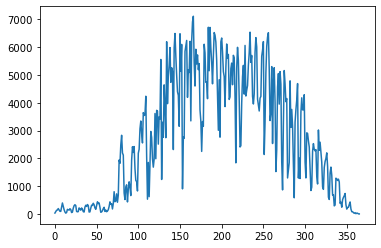

In [40]:
# plot the bikers travelling to Berri1 over the year
import matplotlib.pyplot as plt
%matplotlib inline
df1['Berri1'].plot()

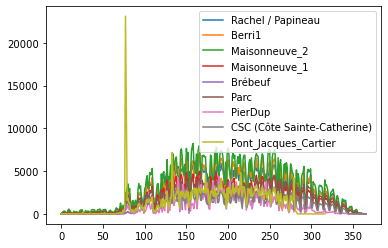

In [43]:
# plot all the columns of bikes_df
df1.plot()

## Value counts

Get count of unique values in a particular column/Series.

In [44]:
# what are the unique genre in imdb_df?
s=df['genre'].value_counts()
print(s)

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64


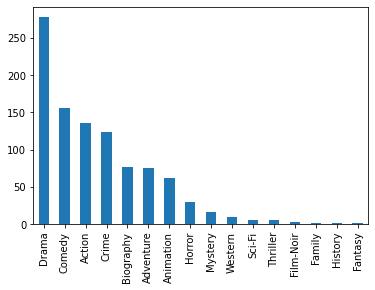

In [45]:
# plotting value counts of unique genres as a bar chart
s.plot(kind="bar")

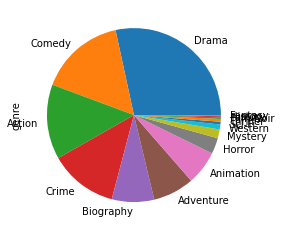

In [46]:
# plotting value counts of unique genres as a pie chart
s.plot(kind="pie")

## Index

### DATAFRAME = COLUMNS + INDEX + ND DATA

### SERIES = INDEX + 1-D DATA

**Index** or (**row labels**) is one of the fundamental data structure of pandas. It can be thought of as an **immutable array** and an **ordered set**.

> Every row is uniquely identified by its index value.

In [50]:
# show index of bikes_df
df1.index

Index(['01/01/2012', '02/01/2012', '03/01/2012', '04/01/2012', '05/01/2012',
       '06/01/2012', '07/01/2012', '08/01/2012', '09/01/2012', '10/01/2012',
       ...
       '22/12/2012', '23/12/2012', '24/12/2012', '25/12/2012', '26/12/2012',
       '27/12/2012', '28/12/2012', '29/12/2012', '30/12/2012', '31/12/2012'],
      dtype='object', name='Date', length=366)

In [54]:
# get row for date 2012-01-01
df1.loc['2012-01-01']

Unnamed: 1                     00:00
Rachel / Papineau                 16
Berri1                            35
Maisonneuve_2                     51
Maisonneuve_1                     38
Brébeuf                            5
Parc                              26
PierDup                           10
CSC (Côte Sainte-Catherine)        0
Pont_Jacques_Cartier              27
Name: 2012-01-01 00:00:00, dtype: object

#### To get row by integer index:

Use ``.iloc[]`` for purely integer-location based indexing for selection by position.

In [55]:
# show 11th row of imdb_df using iloc
df1.iloc[10]

Unnamed: 1                     00:00
Rachel / Papineau                194
Berri1                           273
Maisonneuve_2                    443
Maisonneuve_1                    182
Brébeuf                            7
Parc                             258
PierDup                           12
CSC (Côte Sainte-Catherine)        0
Pont_Jacques_Cartier              20
Name: 2012-01-11 00:00:00, dtype: object

## Selecting rows where column has a particular value

In [56]:
# select only those movies where genre is adventure
df[df['genre'] == 'Adventure']

,star_rating,title,content_rating,genre,duration,actors_list
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
10,8.8,The Lord of the Rings: The Fellowship of the Ring,PG-13,Adventure,178,"[u'Elijah Wood', u'Ian McKellen', u'Orlando Bl..."
14,8.8,The Lord of the Rings: The Two Towers,PG-13,Adventure,179,"[u'Elijah Wood', u'Ian McKellen', u'Viggo Mort..."
15,8.7,Interstellar,PG-13,Adventure,169,"[u'Matthew McConaughey', u'Anne Hathaway', u'J..."
54,8.5,Back to the Future,PG,Adventure,116,"[u'Michael J. Fox', u'Christopher Lloyd', u'Le..."
...,...,...,...,...,...,...
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
937,7.4,Labyrinth,PG,Adventure,101,"[u'David Bowie', u'Jennifer Connelly', u'Toby ..."
943,7.4,The Bucket List,PG-13,Adventure,97,"[u'Jack Nicholson', u'Morgan Freeman', u'Sean ..."
953,7.4,The NeverEnding Story,PG,Adventure,102,"[u'Noah Hathaway', u'Barret Oliver', u'Tami St..."


In [58]:
# which genre has highest number of movies with star rating above 8 and duration more than 130 minutes?
s1 = (df['star_rating'] > 8) & (df['duration'] > 130)
df[s1]['genre'].value_counts()

Drama        36
Action       20
Adventure    17
Crime        13
Biography    12
Comedy        6
Western       6
Mystery       3
Horror        1
Animation     1
Name: genre, dtype: int64

## Adding a new column to DataFrame

In [59]:
# add a weekday column to bikes_df
df1['weekday'] = df1.index.weekday

## Deleting an existing column from DataFrame

In [60]:
# remove column 'Unnamed: 1' from bikes_df
df1.drop('Unnamed: 1', axis=1, inplace=True)

## Deleting a row in DataFrame

In [62]:
# remove row no. 1 from bikes_df
df1.drop(df1.index[0])

,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier,weekday
Date,,,,,,,,,,
2012-01-02,43,83,153,68,11.0,53,6,1,21.0,0
2012-01-03,58,135,248,104,2.0,89,3,2,15.0,1
2012-01-04,61,144,318,116,2.0,111,8,1,19.0,2
2012-01-05,95,197,330,124,6.0,97,13,2,16.0,3
2012-01-06,75,146,244,98,4.0,86,4,0,17.0,4
...,...,...,...,...,...,...,...,...,...,...
2012-12-27,8,12,7,4,NaN,1,2,0,NaN,3
2012-12-28,0,35,3,38,NaN,0,0,0,NaN,4
2012-12-29,0,27,8,42,NaN,9,0,0,NaN,5


## Group By

Any groupby operation involves one of the following operations on the original object. They are −

- Splitting the Object

- Applying a function

- Combining the results

In many situations, we split the data into sets and we apply some functionality on each subset. In the apply functionality, we can perform the following operations −


- **Aggregation** − computing a summary statistic

- **Transformation** − perform some group-specific operation

- **Filtration** − discarding the data with some condition

In [63]:
# group imdb_df by movie genres
genre = df.groupby('genre')

In [64]:
# get crime movies group
genre.get_group('Crime')

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
21,8.7,City of God,R,Crime,130,"[u'Alexandre Rodrigues', u'Matheus Nachtergael..."
...,...,...,...,...,...,...
927,7.5,Brick,R,Crime,110,"[u'Joseph Gordon-Levitt', u'Lukas Haas', u'Emi..."
931,7.4,Mean Streets,R,Crime,112,"[u'Robert De Niro', u'Harvey Keitel', u'David ..."
950,7.4,Bound,R,Crime,108,"[u'Jennifer Tilly', u'Gina Gershon', u'Joe Pan..."
969,7.4,Law Abiding Citizen,R,Crime,109,"[u'Gerard Butler', u'Jamie Foxx', u'Leslie Bibb']"


In [65]:
# get mean of movie durations for each group
genre.aggregate('mean')

,star_rating,duration
genre,,
Action,7.884559,126.485294
Adventure,7.933333,134.840000
Animation,7.914516,96.596774
Biography,7.862338,131.844156
Comedy,7.822436,107.602564
Crime,7.916935,122.298387
Drama,7.902518,126.539568
Family,7.850000,107.500000
Fantasy,7.700000,112.000000


In [69]:
# change duration of all movies in a particular genre to mean duration of the group
df['new_duration'] = genre['duration'].transform(lambda x:x.mean())

In [70]:
# drop groups/genres that do not have average movie duration greater than 120.
df3 = genre.filter(lambda x: x['duration'].mean() > 120)

In [66]:
# group weekday wise bikers count
weekday=df1.groupby('weekday')

In [67]:
# get weekday wise biker count
bikercounts = weekday.aggregate(sum)

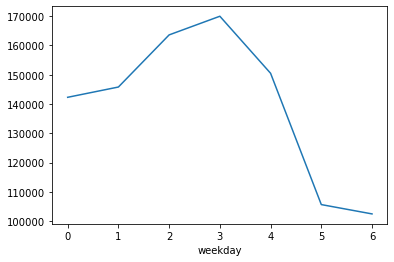

In [68]:
# plot weekday wise biker count for 'Berri1'
bikercounts['Berri1'].plot()

![](https://memegenerator.net/img/instances/500x/73988569/pythonpandas-is-easy-import-and-go.jpg)